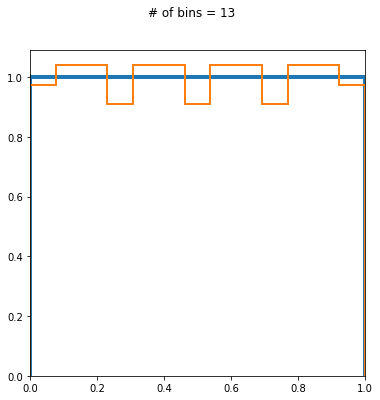

In [126]:
import numpy as np
import matplotlib.pyplot as plt

data = list(np.linspace(0,1,100000))
#data = np.random.normal(size=100000)

#data = [x for x in data if x > 0]

data_compressed = [round(x,2) for x in data]

plt.figure(figsize=(6,6))

def n(x,l1,l2):
    return l1*(np.ceil(l2/l1*(x/l1+1))-np.ceil(l2/l1*(x/l1-1))-1)

n_bins = 13
bin_edges = list(np.linspace(0,1,n_bins+1))

plt.suptitle('# of bins = '+str(n_bins))

plt.axis(xmin=0,xmax=1)
_, _, _ = plt.hist(data, bins=bin_edges, histtype="step",linewidth=4, density=True)
plt.hist(data_compressed,bins=bin_edges, histtype="step", linewidth=2, density=True)
#plt.hist(data_compressed,bins=np.linspace(0,1,1000), histtype="step")

plt.savefig('uniformpeaks')

plt.show()

<Figure size 432x288 with 0 Axes>

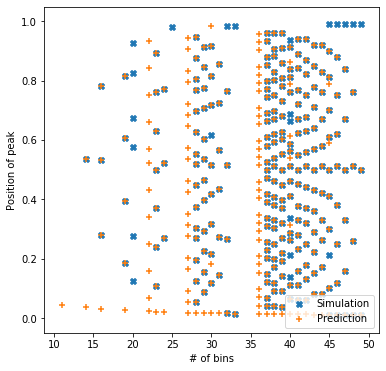

In [125]:
import numpy as np

def n(x,l1,l2):
    return l1*(np.ceil(x/l1+l2/l1/2)-np.ceil(x/l1-l2/l1/2)-1)

data = np.linspace(0,1,100000)

decimals = 2

data_compressed = [round(x,decimals) for x in list(data)]

x = []
y = []

xpredicted = []
ypredicted = []
predictedheight = []

for n_bins in range(1,50):

    #bin_edges = list(np.arange(-1/n_bins/2,1+1/n_bins/2,1/n_bins)) 
    bin_edges = list(np.linspace(0,1,n_bins+1))
    
    #plt.hist(data_compressed,bins=np.linspace(0,1,10000), color='blue',histtype="step")
    hist_data, _, _ = plt.hist(data, bins=n_bins,color='black', histtype="step",linewidth=4)
    #print(sum(hist_data))
    hist_datac, edgesc, _ = plt.hist(data_compressed,bins=bin_edges,color='orange', histtype="step",linewidth=2)
    #print(sum(hist_data))

    plt.suptitle("# of bins = " + str(n_bins))

    mean = np.mean(hist_data)
    #print(mean)
    predictedmean = 0
    
    for i in range(len(hist_datac)):
        predictedmean += n((edgesc[i+1]+edgesc[i])/2,0.01,1/n_bins)
        
        if (hist_datac[i]) > mean*1.1:
            x.append(n_bins)
            y.append((edgesc[i+1]+edgesc[i])/2)
    
    predictedmean = predictedmean / len(hist_datac)
    
    for i in range(len(hist_datac)):
        predicted = n((edgesc[i+1]+edgesc[i])/2,0.01,1/n_bins)
        if predicted > predictedmean*1.1:
            xpredicted.append(n_bins)
            ypredicted.append((edgesc[i+1]+edgesc[i])/2)
            predictedheight.append(predicted)
            

    #plt.axis(xmin=0,xmax=5)
    plt.close()
    #plt.show()

plt.suptitle("Peaks from binning after discretization to 3 decimal places")
    
plt.figure(figsize=(6,6))
plt.scatter(x,y,marker='X', label='Simulation')
plt.scatter(xpredicted,ypredicted,marker='+', label='Prediction')
plt.xlabel("# of bins")
plt.ylabel("Position of peak")
plt.legend(loc=4)
plt.savefig('doublequantscatter')
plt.show()


#plt.scatter(ypredicted, predictedheight)
#plt.yscale('log')
#plt.show()